<a href="https://colab.research.google.com/github/Psaivignesh/Vignesh/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

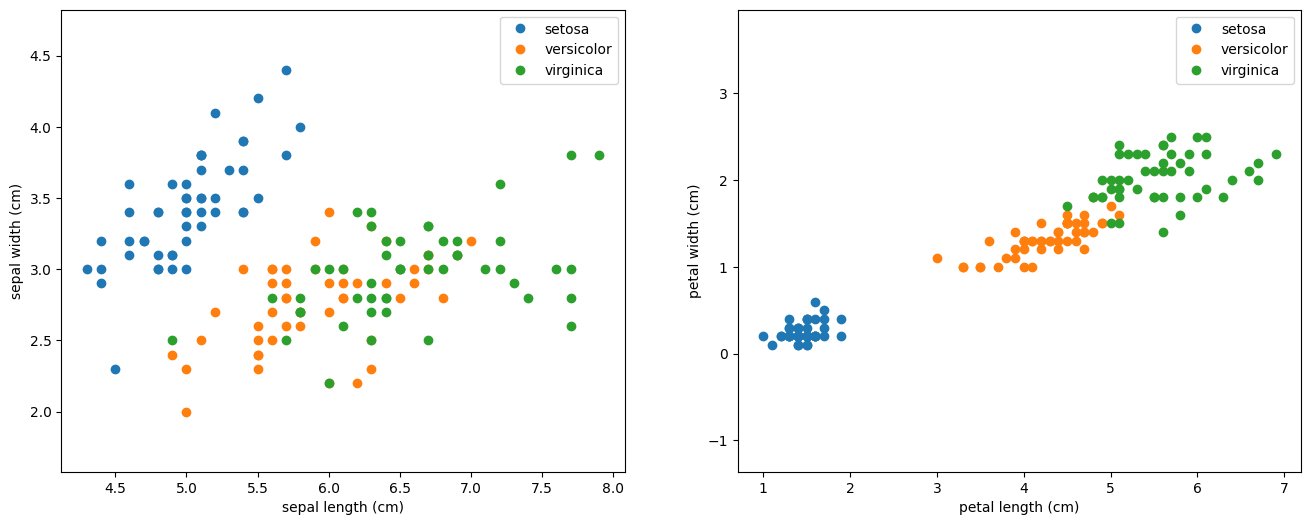

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 255.62it/s]


# Plot training progress

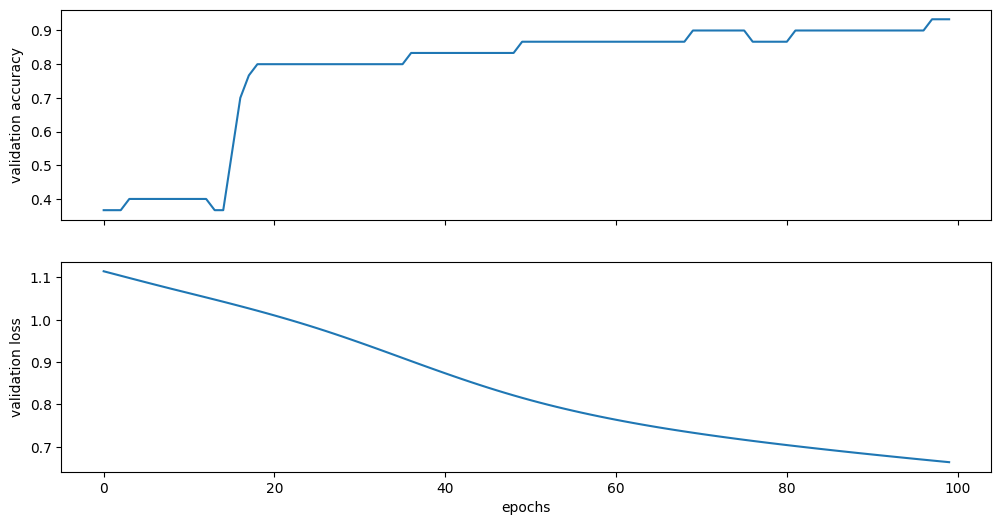

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

## 1st question answers:-
1.Base Architecture Selection: Start with a base architecture that has been proven effective for your problem domain. For example, if you're working on an image classification task, you might begin with a Convolutional Neural Network (CNN) architecture like VGG, ResNet, or Inception.
Define the Range: Decide on a range of the number of hidden layers you want to experiment with. You can start from a shallow architecture with only a few 2.hidden layers and gradually increase the depth to create deeper architectures.
Experiment Setup:
Training Data: Split your dataset into training, validation, and test sets.
Hyperparameters: Keep other hyperparameters constant initially to isolate the effect of changing the number of hidden layers. Later, you can tune them as needed.
3.Architecture Modification:
Add or Remove Layers: Modify the architecture by adding or removing hidden layers. Ensure that the number of input and output units of each layer matches the requirements of your task.
4.Layer Sizes: Adjust the sizes of the hidden layers as needed. Deeper architectures might require larger layer sizes to prevent information bottlenecks.
5.Activation Functions: Choose appropriate activation functions for each layer. Common choices include ReLU, Leaky ReLU, ELU, etc.
Normalization: Consider adding normalization layers (e.g., Batch Normalization) to improve training stability.
Training and Evaluation:
6.Training: Train each modified architecture using the training data. Monitor the training process by tracking metrics such as loss and accuracy on the validation set.
Evaluation: Evaluate the performance of each trained model on the test set to assess its generalization ability.
7.Comparison and Analysis:
Performance Metrics: Compare the performance of models with different numbers of hidden layers using appropriate evaluation metrics (e.g., accuracy, F1 score, etc.).
Overfitting: Watch out for signs of overfitting, especially in deeper architectures. Use regularization techniques if necessary to mitigate overfitting.
8.Training Dynamics: Analyze the training dynamics, such as convergence speed and stability, for each architecture.
Iterate and Fine-Tune:
Based on the performance analysis, iterate on the number of hidden layers and other architectural choices.
Fine-tune hyperparameters and regularization techniques to further improve model performance.
Documentation and Reporting:
Document the results of each experiment, including the architecture configurations, hyperparameters, and performance metrics.
Report on the findings, highlighting the impact of changing the number of hidden layers on model performance.

## 2nd question answer:-

1.Select Base Architecture: Begin with a neural network architecture suitable for your task.
2.Define Range: Choose a range for the number of neurons in the hidden layer(s).
Setup Experiment: Split data, keep other hyperparameters constant initially.
3.Modify Architecture: Adjust the number of neurons in the hidden layer(s), consider activation functions and regularization.
4.Train and Evaluate: Train each modified model, monitor performance on validation set, evaluate on test set.
5.Compare and Analyze: Assess performance metrics, watch for overfitting, analyze complexity-performance trade-off.
6.Iterate and Fine-Tune: Based on analysis, adjust neuron counts and other parameters.
7.Document and Report: Record experiment details and results, report findings.
By systematically adjusting the number of neurons in the hidden layer(s), you can understand its impact on model performance and determine an optimal configuration for your task.

## 3rd question answer:-

1.Base Architecture: Choose a neural network architecture.
2.Activation Functions: Pick different activation functions (e.g., ReLU, Tanh).
3.Experiment Setup: Split data, keep other hyperparameters constant.
4.Modify Architecture: Replace activation functions in layers.
5.Train and Evaluate: Assess performance on validation and test sets.
6.Analysis: Compare results, observe convergence, watch for overfitting.
7.Fine-Tune: Adjust activation functions and other parameters.
Documentation: Record findings and report insights gained.






